In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [2]:
#Read dataset made in EDA program
dat = pd.read_csv('https://raw.githubusercontent.com/ndelcamp/IST_718_Project/master/new_master.csv')
print(dat.columns)
display(dat.head())
print(dat.shape)

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year', 'gdp_for_year ($)',
       'gdp_per_capita ($)', 'generation', 'CODE',
       'civilianFirearmsPer100Persons', 'region', 'subregion',
       'population2017', 'civilianFirearmsCount', 'computationMethod',
       'registeredFirearms', 'unregisteredFirearms', 'Country or Area',
       'InternetUsers', 'Population', 'Rank', 'Percentage', 'PercentRank'],
      dtype='object')


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),...,civilianFirearmsCount,computationMethod,registeredFirearms,unregisteredFirearms,Country or Area,InternetUsers,Population,Rank,Percentage,PercentRank
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,...,350000.0,2,65747.0,284253.0,Albania,2105339,2930187,117,0.7185,75
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,...,350000.0,2,65747.0,284253.0,Albania,2105339,2930187,117,0.7185,75
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,...,350000.0,2,65747.0,284253.0,Albania,2105339,2930187,117,0.7185,75
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,...,350000.0,2,65747.0,284253.0,Albania,2105339,2930187,117,0.7185,75
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,...,350000.0,2,65747.0,284253.0,Albania,2105339,2930187,117,0.7185,75


(27820, 27)


In [3]:
#convert sex to sexf
def getSexF(s):
    if s == 'female':
        return(1)
    elif s == 'male':
        return(0)
    else:
        return(-9999)

dat['sexf'] = dat['sex'].apply(getSexF)
    
#convert age to agen (min age)
def getAge(a):
    a = a[:2]
    return(int(a.replace('-', '')))

dat['agen'] = dat['age'].apply(getAge)

dat.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),...,registeredFirearms,unregisteredFirearms,Country or Area,InternetUsers,Population,Rank,Percentage,PercentRank,sexf,agen
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,...,65747.0,284253.0,Albania,2105339,2930187,117,0.7185,75,0,15
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,...,65747.0,284253.0,Albania,2105339,2930187,117,0.7185,75,0,35
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,...,65747.0,284253.0,Albania,2105339,2930187,117,0.7185,75,1,15
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,...,65747.0,284253.0,Albania,2105339,2930187,117,0.7185,75,0,75
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,...,65747.0,284253.0,Albania,2105339,2930187,117,0.7185,75,0,25


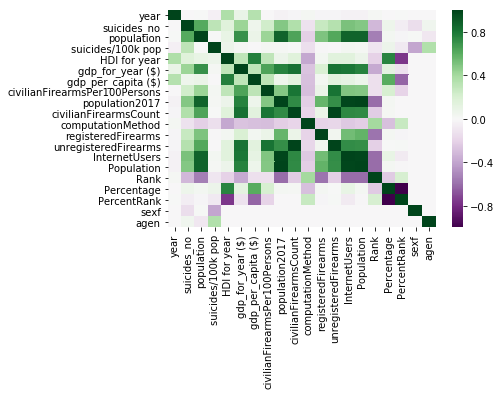

In [4]:
#Correlation Matrix
corr = dat.corr()
sns.heatmap(corr, center = 0, cmap = 'PRGn')
plt.show()

In [5]:
#Data for kmeans
dat = dat.drop(columns = 'HDI for year')
#Drop axis = 0 when using columns that contain nas.
#Drop axis = 1 when not
dat = dat.dropna(axis = 1)

#Retain dat_clean to use for different models
dat_clean = dat.copy()

In [6]:
#Select only numerics
datk = dat.select_dtypes(include = ['float64', 'int64'])
print(datk.columns)
display(datk.head())
print(datk.shape)

Index(['year', 'suicides_no', 'population', 'suicides/100k pop',
       'gdp_for_year ($)', 'gdp_per_capita ($)',
       'civilianFirearmsPer100Persons', 'population2017',
       'civilianFirearmsCount', 'computationMethod', 'InternetUsers',
       'Population', 'Rank', 'Percentage', 'PercentRank', 'sexf', 'agen'],
      dtype='object')


,year,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),civilianFirearmsPer100Persons,population2017,civilianFirearmsCount,computationMethod,InternetUsers,Population,Rank,Percentage,PercentRank,sexf,agen
0,1987,21,312900,6.71,2156624900,796,12.0,2911000,350000.0,2,2105339,2930187,117,0.7185,75,0,15
1,1987,16,308000,5.19,2156624900,796,12.0,2911000,350000.0,2,2105339,2930187,117,0.7185,75,0,35
2,1987,14,289700,4.83,2156624900,796,12.0,2911000,350000.0,2,2105339,2930187,117,0.7185,75,1,15
3,1987,1,21800,4.59,2156624900,796,12.0,2911000,350000.0,2,2105339,2930187,117,0.7185,75,0,75
4,1987,9,274300,3.28,2156624900,796,12.0,2911000,350000.0,2,2105339,2930187,117,0.7185,75,0,25


(27820, 17)


In [7]:
#Standardize each column to 0-1 scale

x = datk.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
datkn = pd.DataFrame(x_scaled, columns = datk.columns)
datkn.head()


,year,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),civilianFirearmsPer100Persons,population2017,civilianFirearmsCount,computationMethod,InternetUsers,Population,Rank,Percentage,PercentRank,sexf,agen
0,0.064516,0.000940,0.007137,0.029826,0.000116,0.004322,0.098088,0.008819,0.000888,0.5,0.008556,0.008929,0.564356,0.684393,0.38172,0.0,0.142857
1,0.064516,0.000716,0.007025,0.023070,0.000116,0.004322,0.098088,0.008819,0.000888,0.5,0.008556,0.008929,0.564356,0.684393,0.38172,0.0,0.428571
2,0.064516,0.000627,0.006607,0.021470,0.000116,0.004322,0.098088,0.008819,0.000888,0.5,0.008556,0.008929,0.564356,0.684393,0.38172,1.0,0.142857
3,0.064516,0.000045,0.000491,0.020403,0.000116,0.004322,0.098088,0.008819,0.000888,0.5,0.008556,0.008929,0.564356,0.684393,0.38172,0.0,1.000000
4,0.064516,0.000403,0.006256,0.014580,0.000116,0.004322,0.098088,0.008819,0.000888,0.5,0.008556,0.008929,0.564356,0.684393,0.38172,0.0,0.285714


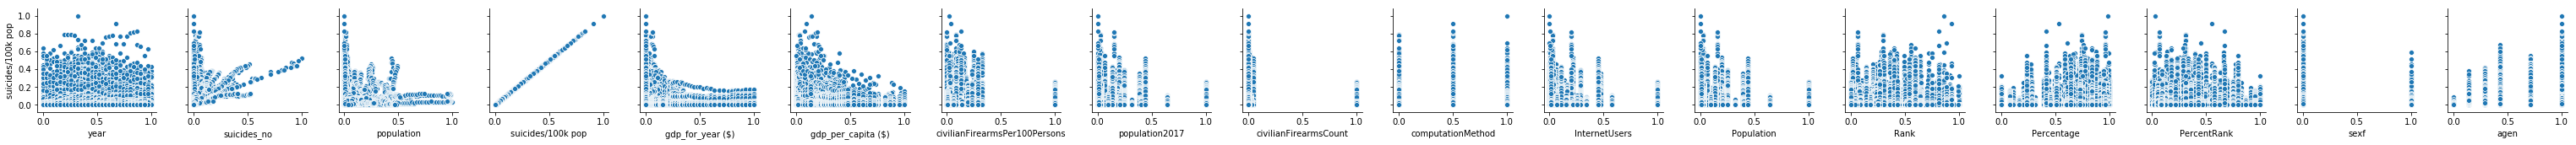

In [8]:
sns.pairplot(datkn, x_vars = datkn.columns, y_vars = 'suicides/100k pop')

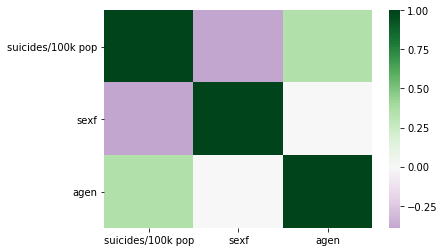

In [9]:
#Subset
keep = ['suicides/100k pop', 'sexf', 'agen']

datk = datkn[keep]

#Correlation Matrix
corr = datk.corr()
sns.heatmap(corr, center = 0, cmap = 'PRGn')
plt.show()

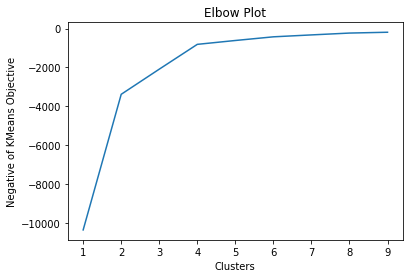

In [10]:
#Test k from 1 to 9
kall = range(1, 10)
scores = []

for k in kall:
    kmeans = KMeans(n_clusters = k, n_jobs = -1, random_state = 1234).fit(datk)
    scores.append(kmeans.score(datk))

sns.lineplot(x = kall, y = scores)
plt.xlabel('Clusters')
plt.ylabel('Negative of KMeans Objective')
plt.title('Elbow Plot')
plt.show()

In [11]:
#Elbow determined Kmeans
kmeans = KMeans(n_clusters = 4, n_jobs = -1, random_state = 1234).fit(datk)
centers = kmeans.cluster_centers_
dat['cluster'] = kmeans.labels_

print('Variables used in clustering:', keep)


Variables used in clustering: ['suicides/100k pop', 'sexf', 'agen']


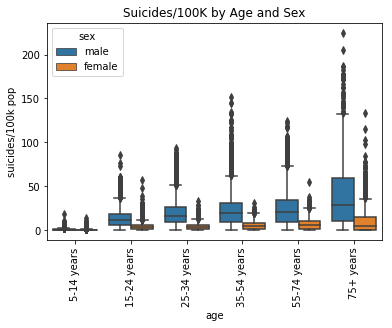

In [12]:
#Plot boxplot of suicide by gender, age

sns.boxplot(data = dat, x = 'age', y = 'suicides/100k pop', hue = 'sex',
            order = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years'])
plt.xticks(rotation = 90)
plt.title('Suicides/100K by Age and Sex')
plt.show()

In [13]:
#Print means by cluster. Rename below
dat.groupby('cluster').mean()


,year,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),civilianFirearmsPer100Persons,population2017,civilianFirearmsCount,computationMethod,InternetUsers,Population,Rank,Percentage,PercentRank,sexf,agen
cluster,,,,,,,,,,,,,,,,,
0,2001.275312,357.505601,1.078035e+06,31.589364,4.452791e+11,16876.573460,13.723768,2.678534e+07,7.578137e+06,1.911245,1.974260e+07,2.682706e+07,84.446359,0.725520,70.168462,0.0,65.000000
1,2001.249892,97.916487,2.137515e+06,3.825787,4.457322e+11,16861.401165,13.722321,2.681416e+07,7.588976e+06,1.911092,1.976477e+07,2.685575e+07,84.423608,0.725502,70.172421,1.0,20.025896
2,2001.275312,140.461008,1.392135e+06,8.521624,4.452791e+11,16876.573460,13.723768,2.678534e+07,7.578137e+06,1.911245,1.974260e+07,2.682706e+07,84.446359,0.725520,70.168462,1.0,65.000000
3,2001.249892,380.812365,2.162833e+06,14.554513,4.457322e+11,16861.401165,13.722321,2.681416e+07,7.588976e+06,1.911092,1.976477e+07,2.685575e+07,84.423608,0.725502,70.172421,0.0,20.025896


In [14]:
#This has to chane due to randomness. (Nevermind, seed is now set before kmeans)
def nameClusters(c):
    if c == 0:
        return('Elder Male')
    elif c == 1:
        return('Young Female')
    elif c == 2:
        return('Elder Female')
    elif c == 3:
        return('Young Male')
    else:
        return(c)

dat['cluster'] = dat['cluster'].apply(nameClusters)

dat.groupby('cluster').mean()

,year,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),civilianFirearmsPer100Persons,population2017,civilianFirearmsCount,computationMethod,InternetUsers,Population,Rank,Percentage,PercentRank,sexf,agen
cluster,,,,,,,,,,,,,,,,,
Elder Female,2001.275312,140.461008,1.392135e+06,8.521624,4.452791e+11,16876.573460,13.723768,2.678534e+07,7.578137e+06,1.911245,1.974260e+07,2.682706e+07,84.446359,0.725520,70.168462,1.0,65.000000
Elder Male,2001.275312,357.505601,1.078035e+06,31.589364,4.452791e+11,16876.573460,13.723768,2.678534e+07,7.578137e+06,1.911245,1.974260e+07,2.682706e+07,84.446359,0.725520,70.168462,0.0,65.000000
Young Female,2001.249892,97.916487,2.137515e+06,3.825787,4.457322e+11,16861.401165,13.722321,2.681416e+07,7.588976e+06,1.911092,1.976477e+07,2.685575e+07,84.423608,0.725502,70.172421,1.0,20.025896
Young Male,2001.249892,380.812365,2.162833e+06,14.554513,4.457322e+11,16861.401165,13.722321,2.681416e+07,7.588976e+06,1.911092,1.976477e+07,2.685575e+07,84.423608,0.725502,70.172421,0.0,20.025896


In [15]:
dat_orig_means = dat
dat_orig_means['fake_group'] = 1
display(dat_orig_means.groupby('fake_group').mean())
display(dat_orig_means[['suicides/100k pop', 'fake_group']].groupby('fake_group').describe())

,year,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),civilianFirearmsPer100Persons,population2017,civilianFirearmsCount,computationMethod,InternetUsers,Population,Rank,Percentage,PercentRank,sexf,agen
fake_group,,,,,,,,,,,,,,,,,
1,2001.258375,242.574407,1.844794e+06,12.816097,4.455810e+11,16866.464414,13.722804,2.680454e+07,7.585359e+06,1.911143,1.975737e+07,2.684618e+07,84.431201,0.725508,70.1711,0.5,35.034508


suicides/100k pop                                                \
                       count       mean        std  min   25%   50%    75%   
fake_group                                                                   
1                    27820.0  12.816097  18.961511  0.0  0.92  5.99  16.62   

                    
               max  
fake_group          
1           224.97

In [16]:
#Revert dat back to clusterless version
dat = dat_clean.copy()

In [17]:
#Subset
#all: 'country', 'year', 'sex', 'age', 'suicides_no', 'population', 'suicides/100k pop', 'country-year', 'gdp_for_year ($)',
#'gdp_per_capita ($)', 'generation', 'CODE', 'civilianFirearmsPer100Persons', 'region', 'subregion', 'population2017', 
#'civilianFirearmsCount', 'computationMethod', 'Country or Area', 'InternetUsers', 'Population', 'Rank', 'Percentage',
#'PercentRank', 'sexf', 'agen'

daty = dat.copy()

#Get only non-numerics
datyallC = daty.select_dtypes(exclude = ['float64', 'int64'])
datyallC = datyallC.drop(columns = ['sex', 'age', 'generation', 'country-year', 'Country or Area'])
#Drop duplicates
datyallC = datyallC.drop_duplicates()

#Group by country and year
daty = daty.groupby(['country', 'year']).agg({'suicides_no': 'sum', 'population': 'sum', 'suicides/100k pop': 'sum', 
                                              'gdp_for_year ($)': 'mean', 'gdp_per_capita ($)': 'mean',
                                              'civilianFirearmsPer100Persons': 'mean', 'civilianFirearmsCount': 'mean',
                                              'InternetUsers': 'mean', 'Rank': 'mean', 'Percentage': 'mean', 
                                              'PercentRank': 'mean'}).reset_index()

#Fix value of suicides/100k pop to correct weighted value
daty['suicides/100k pop'] = daty['suicides_no'] / (daty['population'] / 100000)

#Merge to character variables
datyall = datyallC.merge(daty, 'left', 'country')
display(datyall.head())

#Save all years
dat_by_year = datyall.copy()

#Select a single year
y = 2015
datyall = datyall.loc[datyall.year == y]
display(datyall)


,country,CODE,region,subregion,year,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),civilianFirearmsPer100Persons,civilianFirearmsCount,InternetUsers,Rank,Percentage,PercentRank
0,Albania,ALB,Europe,Southern Europe,1987,73,2709600,2.694125,2156624900,796,12.0,350000.0,2105339,117,0.7185,75
1,Albania,ALB,Europe,Southern Europe,1988,63,2764300,2.279058,2126000000,769,12.0,350000.0,2105339,117,0.7185,75
2,Albania,ALB,Europe,Southern Europe,1989,68,2803100,2.425886,2335124988,833,12.0,350000.0,2105339,117,0.7185,75
3,Albania,ALB,Europe,Southern Europe,1992,47,2822500,1.665190,709452584,251,12.0,350000.0,2105339,117,0.7185,75
4,Albania,ALB,Europe,Southern Europe,1993,73,2807300,2.600363,1228071038,437,12.0,350000.0,2105339,117,0.7185,75


,country,CODE,region,subregion,year,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),civilianFirearmsPer100Persons,civilianFirearmsCount,InternetUsers,Rank,Percentage,PercentRank
48,Antigua and Barbuda,ATG,Americas,Caribbean,2015,1,91889,1.088270,1364863037,14853,5.400000,5000.0,77529,178,0.7600,67
79,Argentina,ARG,Americas,South America,2015,3073,39699624,7.740627,594749285413,14981,7.400000,3256000.0,33561876,23,0.7581,69
103,Armenia,ARM,Asia,Western Asia,2015,74,2795335,2.647268,10553337673,3775,6.100000,186000.0,2043110,118,0.6972,80
148,Australia,AUS,Oceania,Australia/New Zealand,2015,3027,22240785,13.610131,1349034029453,60656,14.500000,3573000.0,21159515,34,0.8654,33
179,Austria,AUT,Europe,Western Europe,2015,1251,8219386,15.220115,382065930308,46484,30.000000,2577000.0,7681957,60,0.8794,29
317,Belgium,BEL,Europe,Western Europe,2015,1867,10624356,17.572830,455039563133,42830,12.700000,1451000.0,10021242,50,0.8768,30
345,Belize,BLZ,Americas,Central America,2015,26,319835,8.129192,1778567600,5561,10.000000,37000.0,176400,174,0.4708,133
378,Brazil,BRA,Americas,South America,2015,11163,191087085,5.841839,1802214373741,9431,8.300000,17510000.0,141206801,4,0.6747,85
469,Chile,CHL,Americas,South America,2015,1838,16565725,11.095198,243999477738,14729,12.100000,2220000.0,14864456,43,0.8233,40
500,Colombia,COL,Americas,South America,2015,2332,44490427,5.241577,291519591533,6552,10.100000,4971000.0,30548252,26,0.6226,98


,year,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),civilianFirearmsPer100Persons,civilianFirearmsCount,InternetUsers,Rank,Percentage,PercentRank
0,0.0,0.000023,0.000020,0.033449,0.000034,0.127794,0.043225,0.000003,0.000090,0.930851,0.710947,0.357955
1,0.0,0.069542,0.132049,0.237914,0.032781,0.128999,0.059850,0.008268,0.137301,0.106383,0.708479,0.369318
2,0.0,0.001675,0.009032,0.081366,0.000541,0.023453,0.049044,0.000463,0.008144,0.611702,0.629399,0.431818
3,0.0,0.068501,0.073851,0.418318,0.074408,0.559202,0.118869,0.009074,0.086479,0.164894,0.847812,0.164773
4,0.0,0.028310,0.027112,0.467802,0.021044,0.425719,0.247714,0.006541,0.031251,0.303191,0.865991,0.142045


(62, 12)


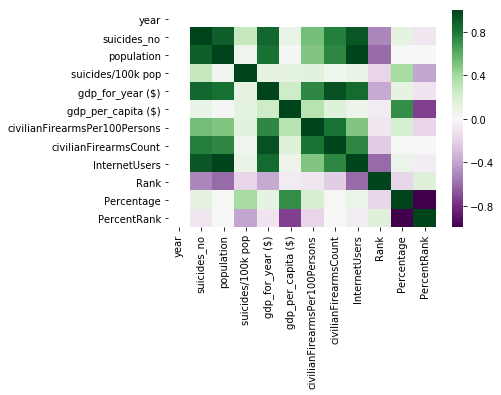

In [18]:
datk2 = datyall.copy()

#Standardize each column to 0-1 scale
datk2 = datk2.select_dtypes(include = ['float64', 'int64'])

#all numeric variables
keep = ['population', 'gdp_for_year ($)', 'gdp_per_capita ($)', 'civilianFirearmsPer100Persons',
        'civilianFirearmsCount', 'InternetUsers', 'Rank', 'Percentage', 'PercentRank']

#datk2 = datk2[keep]

x = datk2.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
datk2 = pd.DataFrame(x_scaled, columns = datk2.columns)
display(datk2.head())
print(datk2.shape)

#Correlation Matrix
corr = datk2.corr()
sns.heatmap(corr, center = 0, cmap = 'PRGn')
plt.show()

In [19]:
#Get all possible combinations of keep list
import itertools
combs = []
for L in range(1, len(keep)):
    for subset in itertools.combinations(keep, L):
        combs.append(subset)

len(combs)

510

In [20]:
#Test k in 2, 3, 4 for all combinations of variables in keep
kall = [2, 3, 4]

kused = []
varskept = []
dists = []

for k in kall:
    for kptup in combs:
        tmplist = [kp for kp in kptup]
        tmpdat = datk2[tmplist]
        kmeans = KMeans(n_clusters = k, n_jobs = -1, random_state = 1234).fit(tmpdat)
        datyall['cluster'] = kmeans.labels_
        grpd = datyall.groupby('cluster').mean()
        kused.append(k)
        varskept.append(tmplist)
        dists.append(grpd['suicides/100k pop'].values)

stds = [d.std() for d in dists]

In [49]:
goodvars = varskept[stds.index(max(stds))]
goodk = kused[stds.index(max(stds))]

print(dists[stds.index(max(stds))])
print(goodvars)
print(goodk)

[ 7.93081815 13.56953449 14.72581287  4.99098496]
['civilianFirearmsCount', 'Percentage']
4


In [50]:
#Long loop determined Kmeans
kmeans = KMeans(n_clusters = goodk, n_jobs = -1, 
                random_state = 1234).fit(datk2[goodvars])
centers = kmeans.cluster_centers_
datyall['cluster'] = kmeans.labels_
datk2['cluster'] = kmeans.labels_

print('Variables used in clustering:', goodvars)


Variables used in clustering: ['civilianFirearmsCount', 'Percentage']


,year,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),civilianFirearmsPer100Persons,civilianFirearmsCount,InternetUsers,Rank,Percentage,PercentRank
cluster,,,,,,,,,,,,
0,2015.0,1917.666667,2.978138e+07,7.930818,3.193557e+11,11036.541667,11.583333,3.766417e+06,2.057697e+07,83.083333,0.615971,99.208333
1,2015.0,3396.000000,2.212149e+07,13.569534,6.807692e+11,38960.121212,14.032323,2.092030e+06,2.008727e+07,72.939394,0.860300,37.272727
2,2015.0,44189.000000,3.000785e+08,14.725813,1.812071e+13,60387.000000,120.500000,3.933470e+08,2.440909e+08,3.000000,0.752300,70.000000
3,2015.0,339.750000,7.454305e+06,4.990985,2.971412e+10,3846.500000,5.125000,6.447500e+05,3.037210e+06,109.000000,0.320025,157.000000


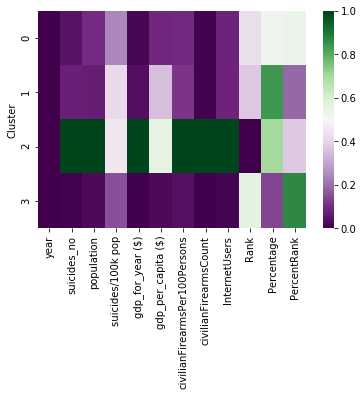

Cluster 0 ['Armenia' 'Belize' 'Brazil' 'Colombia' 'Croatia' 'Cuba' 'Ecuador'
 'Georgia' 'Greece' 'Grenada' 'Italy' 'Mauritius' 'Mexico' 'Panama'
 'Puerto Rico' 'Romania' 'Saint Vincent and Grenadines' 'Serbia'
 'Seychelles' 'South Africa' 'Thailand' 'Turkey' 'Ukraine' 'Uruguay'] 

Cluster 1 ['Antigua and Barbuda' 'Argentina' 'Australia' 'Austria' 'Belgium' 'Chile'
 'Cyprus' 'Czech Republic' 'Denmark' 'Estonia' 'Finland' 'Germany'
 'Hungary' 'Iceland' 'Israel' 'Japan' 'Kazakhstan' 'Latvia' 'Lithuania'
 'Luxembourg' 'Malta' 'Netherlands' 'Norway' 'Poland' 'Qatar'
 'Republic of Korea' 'Russia' 'Singapore' 'Slovenia' 'Spain' 'Sweden'
 'Switzerland' 'United Kingdom'] 

Cluster 2 ['United States'] 

Cluster 3 ['Guatemala' 'Kyrgyzstan' 'Nicaragua' 'Turkmenistan'] 



In [44]:
#Display cluster summarizations

display(datyall.groupby('cluster').mean())

sns.heatmap(datk2.groupby('cluster').mean().reset_index(drop = True), center = 0.5, cmap = 'PRGn')
plt.ylabel('Cluster')
plt.show()

for clust in list(set(datyall.cluster)):
    print('Cluster', clust, datyall.loc[datyall.cluster == clust].country.values, '\n')

In [46]:
#This needs to change based on clusters
def nameClusters(c):
    if c == 0:
        return('Average')#Second lowest suicide rate; between cluster 1 and 3 in all ways.
    elif c == 1:
        return('High minus USA')#Second highest suicide rate; second highest guns (way lower than US); 
                    #second highest GDP; reasonable internet accessibility
    elif c == 2:
        return('Guns, Internet, Money')#Highest suicide rate; an exorbitant amount of guns; highest population; 
                    #highest GDP; most internet accessibility. (It's USA)
    elif c == 3:
        return('Low, low, low')#Lowest suicide rate; lowest amount of guns; lowest GDP; 
                    #least internet accessibility.
    else:
        return(c)

datyall['cluster_name'] = datyall['cluster'].apply(nameClusters)

datyall.groupby('cluster_name').mean()

,year,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),civilianFirearmsPer100Persons,civilianFirearmsCount,InternetUsers,Rank,Percentage,PercentRank,cluster
cluster_name,,,,,,,,,,,,,
Average,2015.0,1917.666667,2.978138e+07,7.930818,3.193557e+11,11036.541667,11.583333,3.766417e+06,2.057697e+07,83.083333,0.615971,99.208333,0
"Guns, Internet, Money",2015.0,44189.000000,3.000785e+08,14.725813,1.812071e+13,60387.000000,120.500000,3.933470e+08,2.440909e+08,3.000000,0.752300,70.000000,2
High minus USA,2015.0,3396.000000,2.212149e+07,13.569534,6.807692e+11,38960.121212,14.032323,2.092030e+06,2.008727e+07,72.939394,0.860300,37.272727,1
"Low, low, low",2015.0,339.750000,7.454305e+06,4.990985,2.971412e+10,3846.500000,5.125000,6.447500e+05,3.037210e+06,109.000000,0.320025,157.000000,3


In [47]:
daty_orig_means = daty
daty_orig_means['fake_group'] = 1
display(daty_orig_means.groupby('fake_group').mean())
display(daty_orig_means[['suicides/100k pop', 'fake_group']].groupby('fake_group').describe())

,year,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),civilianFirearmsPer100Persons,civilianFirearmsCount,InternetUsers,Rank,Percentage,PercentRank
fake_group,,,,,,,,,,,,
1,2001.275312,2907.54847,2.211209e+07,11.738663,4.452791e+11,16876.57346,13.723768,7.578137e+06,1.974260e+07,84.446359,0.72552,70.168462


suicides/100k pop                                                 \
                       count       mean       std  min       25%        50%   
fake_group                                                                    
1                     2321.0  11.738663  8.921654  0.0  4.998151  10.083301   

                                  
                  75%        max  
fake_group                        
1           16.146591  51.019758

In [86]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

#Plot clusters by country

plotly.tools.set_credentials_file(username = 'ndelcamp', api_key = 'wG2numNlud2pbqWlz6KK')

data = [go.Choropleth(
    locations = datyall['CODE'],
    z = datyall['cluster'],
    text = datyall['country'],
    colorscale = [[0.0, 'rgb(165,0,38)'], 
                  [0.3333333333333333, 'rgb(253,174,97)'],
                  [0.6666666666666666, 'rgb(171,217,233)'],
                  [1.0, 'rgb(49,54,149)']],
    autocolorscale = False,
    reversescale = True,
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(180,180,180)',
            width = 0.5
        )),
    colorbar = go.choropleth.ColorBar(
        title = 'Clusters'),
)]

layout = go.Layout(
    title = go.layout.Title(
        text = str('K-Means Clusters by Country, ' + str(y) + '<br>Variables Used: ' + ', '.join(goodvars) + '<br>k = ' + str(goodk))
    ),
    geo = go.layout.Geo(
        showframe = False,
        showcoastlines = False,
        projection = go.layout.geo.Projection(
            type = 'equirectangular'
        )
    )
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig,filename = 'clusters-world-map')



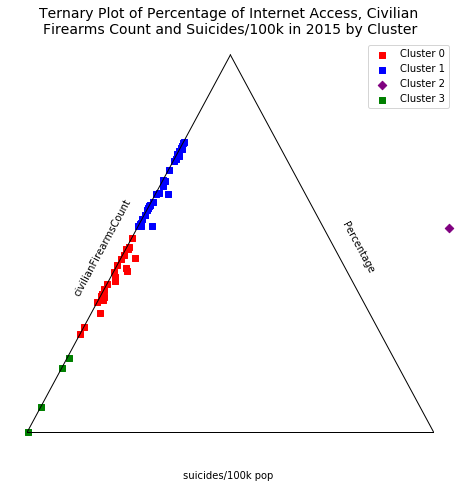

In [295]:
import ternary

#Function to get point sets for ternary plot
def ternary_points(dat, xvar, yvar, zvar, cluster_subset = None):#Use 0, 1/3, 2/3, and 1 for cluster_subset
    points = []
    #Transform to standard scale
    dat = dat.select_dtypes(include = ['float64', 'int64', 'int32'])
    dat = dat[[xvar, yvar, zvar, 'cluster']]
    vals = dat.values
    min_max_scaler = preprocessing.MinMaxScaler()
    scaled = min_max_scaler.fit_transform(vals)
    dat = pd.DataFrame(scaled, columns = dat.columns)
    
    if cluster_subset is not None:
        dat = dat.loc[dat.cluster == cluster_subset]
    
    #Assign points
    for i in range(len(dat)):
        x = dat.iloc[i][xvar]
        y = dat.iloc[i][yvar]
        z = dat.iloc[i][zvar]
        points.append((x, y, z))
    return points

### Scatter Plot
scale = 1.3
figure, tax = ternary.figure(scale = scale)

tax.set_title("Ternary Plot of Percentage of Internet Access, Civilian \nFirearms Count and Suicides/100k in 2015 by Cluster", 
              fontsize = 14)

xvar = 'civilianFirearmsCount'
yvar = 'Percentage'
zvar = 'suicides/100k pop'

tax.boundary(linewidth = 1.0)
figure.set_size_inches(8, 8)
tax.scatter(ternary_points(datyall, xvar, yvar, zvar, 0), 
            marker = 's', color = 'red', label = 'Cluster 0')

tax.scatter(ternary_points(datyall, xvar, yvar, zvar, 1/3), 
            marker = 's', color = 'blue', label = 'Cluster 1')

tax.scatter(ternary_points(datyall, xvar, yvar, zvar, 2/3), 
            marker = 'D', color = 'purple', label = 'Cluster 2')

tax.scatter(ternary_points(datyall, xvar, yvar, zvar, 1), 
            marker = 's', color = 'green', label = 'Cluster 3')

tax.legend()

tax.left_axis_label(xvar, fontsize=10)
tax.right_axis_label(yvar, fontsize=10)
tax.bottom_axis_label(zvar, fontsize=10)

#tax.ticks(axis = 'lbr', linewidth = 1)
# Remove default Matplotlib Axes
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

tax.show()